In [141]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import mplleaflet
from tqdm import tqdm
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from functools import reduce

In [142]:
seattle_listings = pd.read_csv('/Users/gauravshivhare/Desktop/DCU/Notes/Data Mining/Assignment 2/seattle/listings.csv')
seattle_prices = pd.read_csv('/Users/gauravshivhare/Desktop/DCU/Notes/Data Mining/Assignment 2/seattle/calendar.csv').dropna(how = 'any', axis = 0)



In [144]:
##No Data
useless = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_thumbnail_url',
       'host_picture_url', 'smart_location', 'country_code', 'country','street', 'jurisdiction_names',
        'city','state','market','first_review','last_review','license',
        'amenities', 'calendar_last_scraped', 'calendar_updated','listing_url']

seattle_listings.drop(useless, axis=1, inplace=True)

In [145]:
seattle_prices = seattle_prices.rename(columns = {'listing_id' : 'id'})
seattle_listings['host_response_rate'] = seattle_listings['host_response_rate'].apply(lambda x : float(str(x).replace('%', '')) / 100)
seattle_listings['host_acceptance_rate'] = seattle_listings['host_acceptance_rate'].apply(lambda x : float(str(x).replace('%', '')) / 100)
seattle_listings['weekly_price'] = seattle_listings['weekly_price'].apply(lambda x : float(str(x).replace('$', '').replace(',', '')))
seattle_listings['monthly_price'] = seattle_listings['monthly_price'].apply(lambda x : float(str(x).replace('$', '').replace(',', '')))
seattle_listings['security_deposit'] = seattle_listings['security_deposit'].apply(lambda x : float(str(x).replace('$', '').replace(',', '')))
seattle_listings['cleaning_fee'] = seattle_listings['cleaning_fee'].apply(lambda x : float(str(x).replace('$', '').replace(',', '')))
seattle_listings['extra_people'] = seattle_listings['extra_people'].apply(lambda x : float(str(x).replace('$', '').replace(',', '')))
seattle_listings['price'] = seattle_listings['price'].apply(lambda x : float(str(x).replace('$', '').replace(',', '')))
seattle_prices['price'] = seattle_prices['price'].apply(lambda x : float(x.replace('$', '').replace(',', '')))

In [151]:
#s_columns = [col for col in seattle_listings.columns if seattle_listings[col].dtype != 'float64' and seattle_listings[col].dtype != 'int64']
#s_columns


[]

In [147]:
#seattle_listings.host_has_profile_pic.unique()
seattle_listings.host_has_profile_pic=seattle_listings.host_has_profile_pic.fillna('f')
seattle_listings.host_is_superhost=seattle_listings.host_is_superhost.fillna('Null')
seattle_listings.host_neighbourhood=seattle_listings.host_neighbourhood.fillna('Null')
seattle_listings.host_has_profile_pic=seattle_listings.host_has_profile_pic.fillna('Null')
seattle_listings.host_identity_verified=seattle_listings.host_identity_verified.fillna('Null')
seattle_listings.neighbourhood=seattle_listings.neighbourhood.fillna('Null')
seattle_listings.zipcode=seattle_listings.zipcode.fillna('Null')
seattle_listings.property_type=seattle_listings.property_type.fillna('Null')

In [148]:
###seattle_listings = pd.get_dummies(seattle_listings)
seattle_listings['host_is_superhost'] = LabelEncoder().fit_transform(seattle_listings.host_is_superhost)
seattle_listings['host_neighbourhood'] = LabelEncoder().fit_transform(seattle_listings.host_neighbourhood)
seattle_listings['host_verifications'] = LabelEncoder().fit_transform(seattle_listings.host_verifications)
seattle_listings['host_has_profile_pic'] = LabelEncoder().fit_transform(seattle_listings.host_has_profile_pic)
seattle_listings['host_identity_verified'] = LabelEncoder().fit_transform(seattle_listings.host_identity_verified)
seattle_listings['neighbourhood'] = LabelEncoder().fit_transform(seattle_listings.neighbourhood)
seattle_listings['neighbourhood_cleansed'] = LabelEncoder().fit_transform(seattle_listings.neighbourhood_cleansed)
seattle_listings['neighbourhood_group_cleansed'] = LabelEncoder().fit_transform(seattle_listings.neighbourhood_group_cleansed)
seattle_listings['zipcode'] = LabelEncoder().fit_transform(seattle_listings.zipcode)
seattle_listings['is_location_exact'] = LabelEncoder().fit_transform(seattle_listings.is_location_exact)
seattle_listings['property_type'] = LabelEncoder().fit_transform(seattle_listings.property_type)
seattle_listings['room_type'] = LabelEncoder().fit_transform(seattle_listings.room_type)
seattle_listings['bed_type'] = LabelEncoder().fit_transform(seattle_listings.bed_type)
seattle_listings['has_availability'] = LabelEncoder().fit_transform(seattle_listings.has_availability)
seattle_listings['requires_license'] = LabelEncoder().fit_transform(seattle_listings.requires_license)
seattle_listings['instant_bookable'] = LabelEncoder().fit_transform(seattle_listings.instant_bookable)
seattle_listings['cancellation_policy'] = LabelEncoder().fit_transform(seattle_listings.cancellation_policy)
seattle_listings['require_guest_profile_picture'] = LabelEncoder().fit_transform(seattle_listings.require_guest_profile_picture)
seattle_listings['require_guest_phone_verification'] = LabelEncoder().fit_transform(seattle_listings.require_guest_phone_verification)
                                                                                     
                                                                                     

In [149]:
seattle_listings.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,0.96,1.0,1,79,3.0,3.0,86,1,2,...,10.0,9.0,10.0,0,0,1,0,0,2,4.07
1,953595,0.98,1.0,2,79,6.0,6.0,33,1,2,...,10.0,10.0,10.0,0,0,2,1,1,6,1.48
2,3308979,0.67,1.0,1,79,2.0,2.0,59,1,2,...,10.0,10.0,10.0,0,0,2,0,0,2,1.15
3,7421966,NaN,NaN,1,79,1.0,1.0,40,1,2,...,NaN,NaN,NaN,0,0,0,0,0,1,NaN
4,278830,1.00,NaN,1,79,2.0,2.0,41,1,2,...,10.0,9.0,9.0,0,0,2,0,0,1,0.89


In [150]:
print(seattle_listings.shape)
print(seattle_prices.shape)


(3818, 54)
(934542, 4)


In [154]:
seattle_df = pd.merge(seattle_listings, seattle_prices, on = 'id')
seattle_df.columns

Index(['id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'square_feet', 'price_x', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_

In [155]:
seattle_df.shape

(934542, 57)

In [156]:
s_columns = [col for col in seattle_df.columns if seattle_df[col].dtype == 'float64' or seattle_df[col].dtype == 'int64']

In [162]:
seattle_numeric = seattle_df[s_columns]


In [163]:
seattle_numeric.columns

Index(['id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'square_feet', 'price_x', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_

In [165]:
seattle_numeric = seattle_numeric.drop(columns = seattle_numeric.columns[seattle_numeric.isnull().all()])

In [166]:
seattle_numeric.columns[seattle_numeric.isnull().any()]

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [167]:
fill_median = lambda col : col.fillna(col.median())
seattle_numeric = seattle_numeric.apply(fill_median, axis = 0)

In [168]:

seattle_numeric.columns

Index(['id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'square_feet', 'price_x', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_

In [169]:
seattle_numeric.columns[seattle_numeric.isnull().any()]

Index([], dtype='object')

In [170]:
from sklearn.utils import shuffle
seattle_numeric = shuffle(seattle_numeric)

In [171]:

def train_test_id(id_lst, test_portion = 0.3):
    """
        Randomly split training and test id.
        Input: 
            id_lst is the list of all ids
        return:
            train_id_list, test_id_list
    """
    id_set = set(id_lst)
    size = len(id_set)
    test_set = set()
    while True:
        if np.random.rand() <= 0.5:
            test_set.add(id_set.pop())
        if len(test_set) >= test_portion * size:
            break
    return id_set, test_set

In [172]:
def search_params(params, estimator, X, y, cv = 5):
    """
        Search optimal hyper-parameters for estimator.
    """
    clf = GridSearchCV(estimator, params, cv = cv, scoring = 'neg_mean_squared_error', verbose = 2)
    clf.fit(X, y)
    return clf.best_params_

def cal_rmse(y_pred, y_true):
    """
        calculate root mean square error based on predicted and true result.
    """
    return np.sqrt(np.sum((y_pred - y_true)**2 / len(y_pred)))

In [173]:
X_seattle, y_seattle = seattle_numeric.loc[:,seattle_numeric.columns != 'price_y'], seattle_numeric['price_y']

In [174]:
train_id, test_id = train_test_id(seattle_numeric['id'].unique())

#Generate training_entries and test_entries:
train_entries = list(tqdm(map(lambda x : x in train_id, seattle_numeric['id'])))
test_entries = list(tqdm(map(lambda x : x in test_id, seattle_numeric['id'])))

X_train, X_test, y_train, y_test = X_seattle[train_entries], X_seattle[test_entries], \
                                   y_seattle[train_entries], y_seattle[test_entries]

934542it [00:01, 575674.16it/s]
934542it [00:01, 741711.23it/s]


In [28]:
params = {'booster' : ['gbtree'],
          'max_depth' : [5, 7, 10],
          'learning_rate' : [0.1],
          'n_estimators' : [200]}

xgb = XGBRegressor()
seattle_opt_params = search_params(params, xgb, X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] booster=gbtree, learning_rate=0.1, max_depth=5, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/Macbook_FZN/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  booster=gbtree, learning_rate=0.1, max_depth=5, n_estimators=200, total= 4.8min
[CV] booster=gbtree, learning_rate=0.1, max_depth=5, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.8min remaining:    0.0s
/Users/Macbook_FZN/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  booster=gbtree, learning_rate=0.1, max_depth=5, n_estimators=200, total= 4.8min
[CV] booster=gbtree, learning_rate=0.1, max_depth=5, n_estimators=200 


/Users/Macbook_FZN/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  booster=gbtree, learning_rate=0.1, max_depth=5, n_estimators=200, total= 4.8min
[CV] booster=gbtree, learning_rate=0.1, max_depth=5, n_estimators=200 


/Users/Macbook_FZN/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  booster=gbtree, learning_rate=0.1, max_depth=5, n_estimators=200, total= 5.0min
[CV] booster=gbtree, learning_rate=0.1, max_depth=5, n_estimators=200 


/Users/Macbook_FZN/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  booster=gbtree, learning_rate=0.1, max_depth=5, n_estimators=200, total= 4.6min
[CV] booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=200 


/Users/Macbook_FZN/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=200, total= 6.4min
[CV] booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=200 


/Users/Macbook_FZN/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=200, total= 6.5min
[CV] booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=200 


/Users/Macbook_FZN/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=200, total= 6.2min
[CV] booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=200 


/Users/Macbook_FZN/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=200, total= 6.2min
[CV] booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=200 


/Users/Macbook_FZN/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  booster=gbtree, learning_rate=0.1, max_depth=7, n_estimators=200, total= 6.5min
[CV] booster=gbtree, learning_rate=0.1, max_depth=10, n_estimators=200 


/Users/Macbook_FZN/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  booster=gbtree, learning_rate=0.1, max_depth=10, n_estimators=200, total= 9.7min
[CV] booster=gbtree, learning_rate=0.1, max_depth=10, n_estimators=200 


/Users/Macbook_FZN/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[CV]  booster=gbtree, learning_rate=0.1, max_depth=10, n_estimators=200, total= 8.9min
[CV] booster=gbtree, learning_rate=0.1, max_depth=10, n_estimators=200 


/Users/Macbook_FZN/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


KeyboardInterrupt: 

In [175]:
seattle_opt_params = {'booster' : 'gbtree', 'max_depth' : 7, 'learning_rate' : 0.1, 'n_estimator' : 200}
xgb_seattle = XGBRegressor(**seattle_opt_params)
xgb_seattle.fit(X_train, y_train, eval_metric = 'rmse')
y_pred_seattle = xgb_seattle.predict(X_test)
print(cal_rmse(y_pred_seattle, y_test))

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


40.92198294281271


In [176]:
print(y_pred_seattle)
print(y_pred_seattle.shape)
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
X_seattle.head()

[246.00548  144.86537   71.23522  ...  49.671635 157.15688  225.007   ]
(280304,)
(654238,)
(654238, 54)
(280304, 54)


,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
319537,1493197,0.94,1.0,1,6,34.0,34.0,34,1,2,...,10.0,10.0,9.0,0,1,2,1,1,6,0.78
398348,1684236,1.00,1.0,2,26,1.0,1.0,72,1,2,...,10.0,10.0,10.0,0,0,1,0,0,1,1.82
221427,4857192,0.83,1.0,2,61,4.0,4.0,60,1,2,...,10.0,10.0,10.0,0,0,2,0,0,4,1.54
671051,7435912,0.90,1.0,1,13,1.0,1.0,46,1,1,...,10.0,10.0,9.0,0,0,0,0,0,1,0.94
180566,8156894,0.90,1.0,1,13,37.0,37.0,33,1,2,...,10.0,10.0,10.0,0,0,2,0,0,37,1.55


In [183]:

def visualize_pred(y_pred, y_test, city = 'Boston'):
    """
        Visualize predicted result for 200 randomly selected samples
    """
    vis_lst = [i for i in range(len(y_pred))]
    np.random.shuffle(vis_lst)
    y_test = y_test.reset_index()

    fig, ax = plt.subplots(figsize=(10,8))
    ax.set(xlabel='Samples', ylabel='prices',
           title='Predicted and true price comparison for Airbnb in ' + city +' area(200 samples)')
    ax.plot(range(len(y_pred[vis_lst[:200]])),y_pred[vis_lst[:200]], color = 'blue')
    ax.plot(range(len(y_test.loc[vis_lst[:200], 'price_y'])),y_test.loc[vis_lst[:200], 'price_y'], color = 'red')
    ax.legend(('predicted price', 'true price'),
               loc='upper right')
    plt.show()



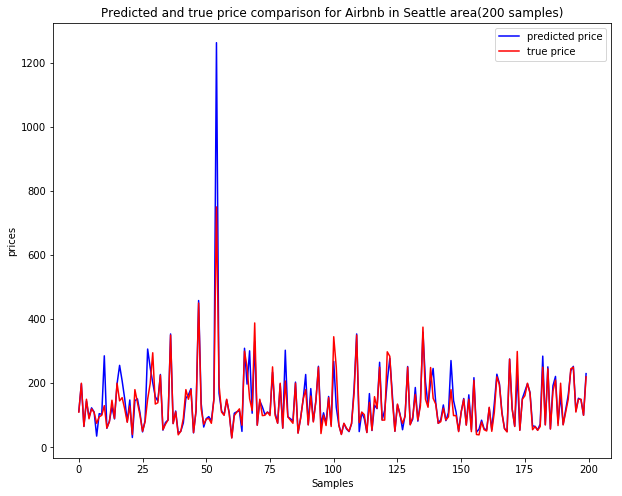

In [184]:
visualize_pred(y_pred_seattle, y_test, 'Seattle')

In [179]:
y_pred_seattle.size


280304

In [180]:
y_test.size

280304

In [181]:
def visualize_feature(features, feat_importance, city = 'Seattle'):
    """
        Visualize important features for predicting renting prices
    """
    fig, ax = plt.subplots(figsize=(15,10))
    plt.figure(figsize=(10,15))
    ax.set(xlabel='feature name', ylabel='feature importance',
           title='feature importance level for ' + city + ' city')
    ax.bar(features, feat_importance)
    plt.xticks(features, rotation='vertical')
    plt.show()

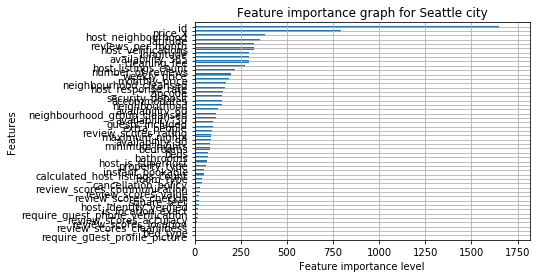

In [182]:
plot_importance(xgb_seattle, height=0.5, show_values=False, xlabel='Feature importance level', \
                title='Feature importance graph for Seattle city')
plt.show()